# Basic Programming Using Python: Creating Functions

## Learning Goals
- Define Python functions and compose function calls.
- Explain the benefits of breaking a program up into functions.
- Explain what a call stack is, what a variable's scope is, and how the two concepts are related, and trace values as they are passed into and returned by functions.

The `novice` module and images used in this notebook are from the 
[synesthesiam/novice](https://github.com/synesthesiam/novice) code repository,
courtesy of Michael Hanson.

## Declaring a Function

We used functions several times in the [previous lesson](./python-0-resize-image.ipynb).
It is now time to learn how to create new ones ourselves
so that we don't have to type in the same lines of code repeatedly.

A function's job is to bundle several steps together
so that they can be used as if they were a single command&mdash;in other words,
to create a new verb in our programming language.
The simplest possible function is one that produces the same value each time it is called:

In [1]:
def zero():
    return 0

We define a new function in Python using the keyword `def`,
followed by the function's name.
The empty parentheses signal that the function doesn't take any inputs&mdash;we'll
see functions that do in a moment.
The colon signals the start of a new *block* of code,
called the *body* of the function,
which is indented.
The keyword `return` then specifies the value the function produces
when it is called.

Defining a function tells the computer how to do something.
To actually *do* that "something",
we need to call the function:

In [2]:
result = zero()
print (f'function produced: {result}')

function produced: 0


When Python sees the call `zero()` it sets aside whatever it was doing,
does whatever the function `zero` tells it to do,
and then continues with its original calculation using the function's result.
In this case the overall effect is to assign 0 to `result`,
which is then printed.
We can achieve the same effect without the assignment:

In [3]:
print (f'function produced: {zero()}')

function produced: 0


Functions that always produce the same value aren't particularly useful,
so most functions take input values
called *parameters* or *arguments*.
A parameter is a variable that is assigned a value each time the function is called.
For example,
this function that converts a temperature from Fahrenheit to Kelvin
has one parameter called `temp`:

In [4]:
def fahr_to_kelvin(temp):
    return ((temp - 32.0) * 5.0/9.0) + 273.15

In [5]:
print (f'water freezes at {fahr_to_kelvin(32)}')
print (f'water boils at {fahr_to_kelvin(212)}')

water freezes at 273.15
water boils at 373.15


Functions can have any number of parameters.
When we call a function,
we must provide as many values as there are parameters;
values are assigned to parameters from left to right.
For example,
here's a function that calculates the average of three values:

In [6]:
def average3(left, middle, right):
    return (left + middle + right) / 3

In [7]:
x = 3
y = 5
z = 4
print (f'average is: {average3(x, y, z)}')

average is: 4.0


## The Stack

The key to understanding how functions work,
and to debugging them when they don't,
is to understand exactly what happens when a function is called.
After Python has executed the first six lines of the program above,
the variables `x`, `y`, and `z` are stored like this in memory:

![Python Stack Frame](images/stack_frame.png)

The box containing those three variables is called a *stack frame*.
When `average3` is called on line 7,
Python creates a new stack frame on top of the first one,
then creates the variables `left`, `middle`, and `right` in it:

![average3 stack](images/stack_average3.png)

This pile of one set of variables on top of another is called the *function call stack*,
or just the *stack*.
When the function call is finished,
Python discards the topmost stack frame
and starts using the one beneath it again.
The temporary variables `left`, `middle`, and `right` vanish,
which is why trying to print one of their values fails:

In [9]:
print (f'middle after call: {middle}')

NameError: name 'middle' is not defined

Python tries to get the value of `middle`,
it discovers that it doesn't exist any longer
and reports an error.

Why does Python go to all the trouble of creating and discarding stack frames?
To understand the answer,
let's first define another conversion function:

In [10]:
def kelvin_to_celsius(temp):
    return temp - 273.15

In [11]:
print (f'absolute zero is {kelvin_to_celsius(0.0)} degrees Celsius')

absolute zero is -273.15 degrees Celsius


As its name suggests,
`kelvin_to_celsius` converts temperatures from Kelvin to Celsius.
Now that we have it,
we don't have to do any calculations to convert Fahrenheit to Celsius.
Instead,
we can combine the two functions we already have:

In [12]:
def fahr_to_celsius(temp):
    degrees_k = fahr_to_kelvin(temp)
    degrees_c = kelvin_to_celsius(degrees_k)
    return degrees_c

In [13]:
body_temp_f = 98.6
print (f'body temperature in Celsius: {fahr_to_celsius(body_temp_f)}')

body temperature in Celsius: 37.0


Let's trace what happens when we calculate human body temperature in &deg;C.
Just before Python executes line 7 of our program,
the stack consists of a single frame
that contains the variable `body_temp_f`:

![body temperature stack frame](images/stack_frame_body_temp.png)

When `fahr_to_celsius` is called,
Python puts a new frame on the stack
containing a variable `temp`
(the parameter of `fahr_to_celsius`):

![fahr_to_celcius stack](images/stack_fahr_celcius.png)

The first thing `fahr_to_celsius` does is called `fahr_to_kelvin`.
Python creates yet another stack frame to keep track of this call,
and this frame also contains a variable called `temp`:

![fahr_to_kelvin stack](images/stack_fahr_kelvin.png)

`fahr_to_kelvin`'s `temp` is *not* the same variable as `fahr_to_celsius`'s `temp`.
The two variables happen to have the same name,
but since they're in different stack frames,
they're as different as Einstein's glasses and Feynman's glasses.

When `fahr_to_kelvin` finishes running,
its stack frame is thrown away:

![fahr_to_kelvin result stack](images/stack_fahr_kelvin_result.png)

and the value `fahr_to_kelvin` produced is assigned to a new variable called `degrees_k`.
This variable is created in `fahr_to_celsius`'s stack frame;
like the parameter `temp`,
it only exists as long as the function is being executed.
`fahr_to_celsius` then passes this value to `kelvin_to_celsius`,
and once again,
Python creates a new stack frame to keep track of the call:

![kelvin_to_celcius stack](images/stack_kelvin_celcius.png)

When `kelvin_to_celsius` is finished running,
its result is assigned to `degrees_c`
and its stack frame is discarded:

![kelvin_to_celcius result stack](images/stack_kelvin_celcius_result.png)

Since `fahr_to_celsius` is now finished,
Python discards *its* stack frame
and prints the final result.

![fahr_to_celcius results stack frame](images/stack_frame_fahr_celcius_result.png)

We can achieve the same result more simply like this:

In [14]:
def fahr_to_celsius(temp):
    return kelvin_to_celsius(fahr_to_kelvin(temp))

In [15]:
body_temp_f = 98.6
print (f'body temperature in Celsius: {fahr_to_celsius(body_temp_f)}')

body temperature in Celsius: 37.0


Passing the result of one function call directly to another like this is called *nesting* the calls.
Python executes nested calls in exactly the same way as
it executes calls whose results are assigned to temporary intermediate variables:
it creates a stack frame for each call,
stores parameters and *local variables* like `degrees_k` and `degrees_c` in that frame,
and discards them all when the function is finished.

## Creating Thumbnails

We're now ready to write a function that creates thumbnails.
The program we had at the end of our [previous lesson](python-0-resize-image.ipynb) was:

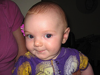

In [19]:
import novice
flower = novice.open('images/flower.png')

new_height = flower.height * (100.0 / flower.width)
flower.size = (100, new_height)
flower

Most programmers put `import` statements at the top of their programs
rather than inside functions,
both to make it easier for people to see what libraries a program depends on,
and because many functions might depend on the contents of a particular library.
That leaves us with four lines of code to *encapsulate* in our function,
which we will rather unimaginatively call `make_thumbnail`:

In [20]:
def make_thumbnail(filename):
    picture = novice.open(filename)
    new_height = int(picture.height * 100.0 / picture.width)
    picture.size = (100, new_height)
    return picture

Our function takes a single parameter,
which is the name of the image file to be thumbnailed,
and loads and thumbnails that picture.
As always,
defining the function tells Python how to do something new,
but it doesn't actually do that "something" until we call the function:

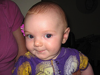

In [22]:
flower = make_thumbnail('images/flower.png')
flower

We can now make other thumbnails with a single call:

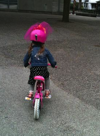

In [23]:
biking = make_thumbnail('images/biking.png')
biking

## Default Parameter Values

What if we want to create thumbnails that are 80 pixels wide as well?
One possibility would be to create another function called `make_thumbnail_80`
that contained exactly the same lines of code,
but with the number 80 everywhere instead of the number 100.
This would work,
but would be a bad design.
A major reason for writing functions is to reduce duplicated code.
If we have two or more functions that contain almost the same code,
we haven't really achieved that.
(It's also bad design to have one function called `make_thumbnail_80`
and another called `make_thumbnail`:
if one function's name specifies the thumbnail size,
the other should as well.)

A better design is to require users to tell us how wide they want thumbnails to be:

In [24]:
def make_thumbnail(filename, width):
    picture = novice.open(filename)
    new_height = int(picture.height * float(width) / picture.width)
    picture.size = (width, new_height)
    return picture

Let's try it for two different sizes of thumbnails:

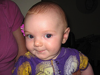

In [25]:
test_100 = make_thumbnail('images/flower.png', 100)
test_100

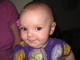

In [26]:
test_80 = make_thumbnail('images/flower.png', 80)
test_80

It does what we want,
but we can go one step further.
Suppose that thumbnails are almost always 100 pixels wide,
and that other sizes are rare.
In that case,
we can define `make_thumbnail_width` with a `width` parameter to handle the general case,
and `make_thumbnail_default` *without* such a parameter to handle the usual case.
Rather than duplicating code,
we have the second call the first with the default width as a second parameter:

In [27]:
def make_thumbnail_width(filename, width):
    picture = novice.open(filename)
    new_height = int(picture.height * float(width) / picture.width)
    picture.size = (width, new_height)
    return picture

def make_thumbnail_default(filename):
    return make_thumbnail_width(filename, 100)

In some languages,
like C and Fortran,
this is the best we can do.
In Python and many other modern languages,
though,
we can improve our design even further
by writing a single function with two parameters,
and specifying a *default value* for the second parameter:

In [28]:
def make_thumbnail(filename, width=100):
    picture = novice.open(filename)
    new_height = int(picture.height * float(width) / picture.width)
    picture.size = (width, new_height)
    return picture

If we call this function with one parameter,
the default value of 100 is assigned to `width`:

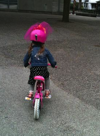

In [29]:
temp = make_thumbnail('images/biking.png')
temp

If we call it with two,
though,
the second value we give it overrides that default:

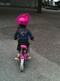

In [30]:
temp = make_thumbnail('images/biking.png', 60)
temp

<hr/>

### *Seven Plus Or Minus Two*

<em>
We set out to write a thumbnailing function
so that we wouldn't have to type in the same calculations over and over.
Now that we have it,
we can see another reason for building programs out of functions.
Human short-term memory can only hold a few items at a time;
the value is sometimes given as "seven plus or minus two",
and while that is an over-simplification,
it's a good guideline.
If we need to remember more unrelated bits of information than that for more than a few seconds,
they become jumbled and we start making mistakes.
If we have to keep more than half a dozen things straight in our mind
in order to understand or change a piece of code,
we will therefore start making mistakes.
Since most calculations involve more than half a dozen steps,
we have to group those steps together and give them names
if we're to have any hope at all of getting them right.
</em>

<hr/>

## Key Points

- Define a function using `def name(...)`
- The body of a function must be indented.
- Use `name(...)` to call a function.
- Use `return` to return a value from a function.
- The values passed into a function are assigned to its parameters in left-to-right order.
- Function calls are recorded on a call stack.
- Every function call creates a new stack frame.
- The variables in a stack frame are discarded when the function call completes.
- Grouping operations in functions makes code easier to understand and re-use.